### Proposed Topic: Prediction Of House Rates

### Features Of Dataset:

1. id - Unique ID for each home sold
2. date - Date of the home sale
3. price - Price of each home sold
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. sqft_living - Square footage of the apartments interior living space
7. sqft_lot - Square footage of the land space
8. floors - Number of floors
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
10. view - An index from 0 to 4 of how good the view of the property was
11. condition - An index from 1 to 5 on the condition of the apartment,
12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
13. sqft_above - The square footage of the interior housing space that is above ground level
14. sqft_basement - The square footage of the interior housing space that is below ground level
15. yr_built - The year the house was initially built
16. yr_renovated - The year of the house’s last renovation
17. zipcode - What zipcode area the house is in
18. lat - Lattitude
19. long - Longitude
10. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Exploratory Data Analysis

In [2]:
# read the csv file 
Dataframe = pd.read_csv('House_data.csv')

In [3]:
Dataframe.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#metadata of dataset
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#Some statistical data related to dataset
Dataframe.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#let's break date to years, months
Dataframe['date'] = pd.to_datetime(Dataframe['date'])#only keeps date part from the format
Dataframe['month'] = Dataframe['date'].apply(lambda date:date.month)
Dataframe['year'] = Dataframe['date'].apply(lambda date:date.year)
Dataframe.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


#### Data preprocessing

#### Dataset Cleaning :  process of detecting and removing corrupt or inaccurate or irrelevant data from a dataset.

In [7]:
#Droping un-necessary information or columns from dataset
Dataframe = Dataframe.drop(['id','zipcode','date'],axis=1)
Dataframe.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015


In [8]:
#Missing data percentage list to clean 
for column in Dataframe.columns:
    percentage_missing = np.mean(Dataframe[column].isnull()) #detect missing values in the given series of object
    print('{} - {}%'.format(column, round(percentage_missing*100)))

price - 0%
bedrooms - 0%
bathrooms - 0%
sqft_living - 0%
sqft_lot - 0%
floors - 0%
waterfront - 0%
view - 0%
condition - 0%
grade - 0%
sqft_above - 0%
sqft_basement - 0%
yr_built - 0%
yr_renovated - 0%
lat - 0%
long - 0%
sqft_living15 - 0%
sqft_lot15 - 0%
month - 0%
year - 0%


#### Data Visualization

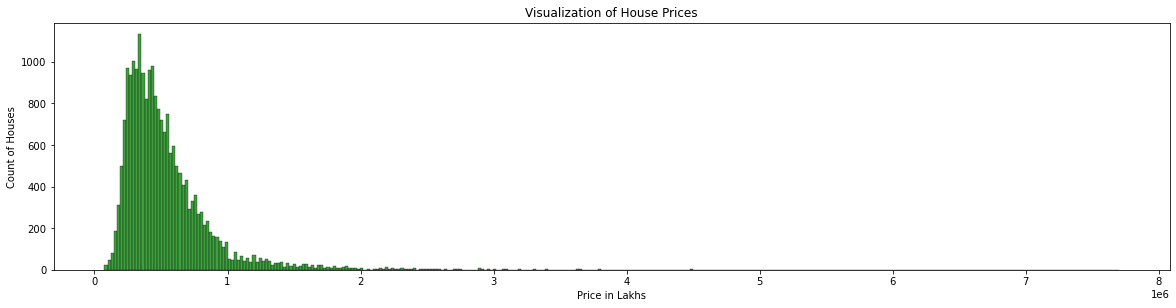

In [9]:
#Visualization Of price data
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,1,1)
sns.histplot(Dataframe['price'],color="green")
plt.xlabel("Price in Lakhs")
plt.ylabel("Count of Houses")
plt.title("Visualization of House Prices")
plt.show()

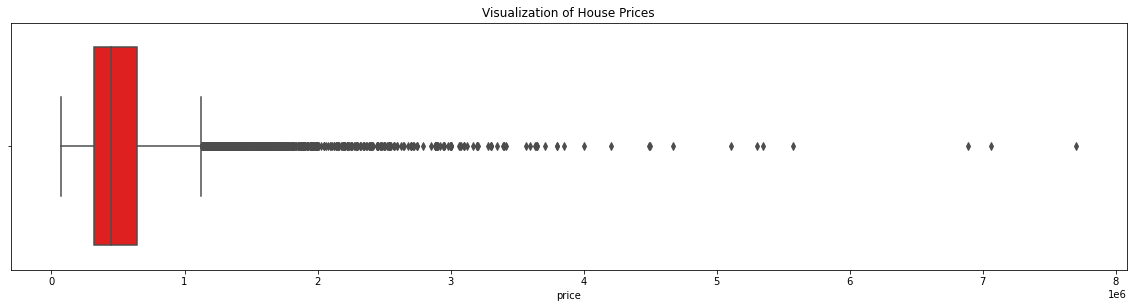

In [10]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(2,1,1)
sns.boxplot(x = Dataframe['price'],color="red")
plt.title("Visualization of House Prices")
plt.show()

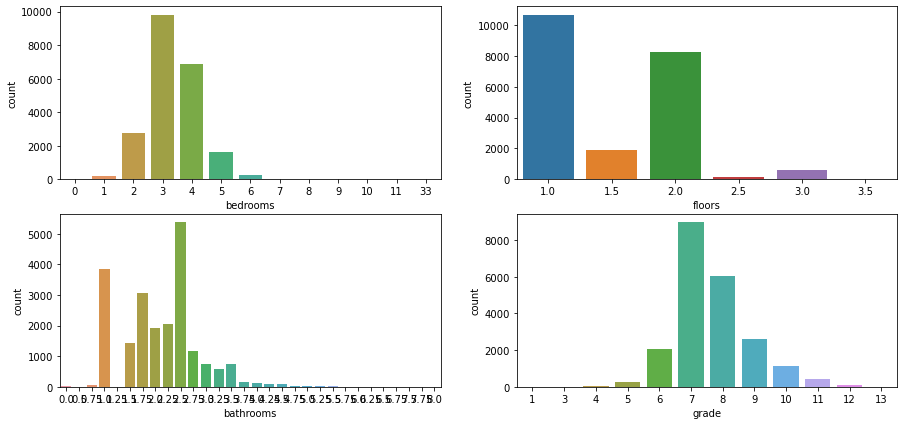

In [11]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(x = Dataframe['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(x = Dataframe['floors'])
fig.add_subplot(2,2,3)
sns.countplot(x = Dataframe['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(x = Dataframe['grade'])
plt.show()

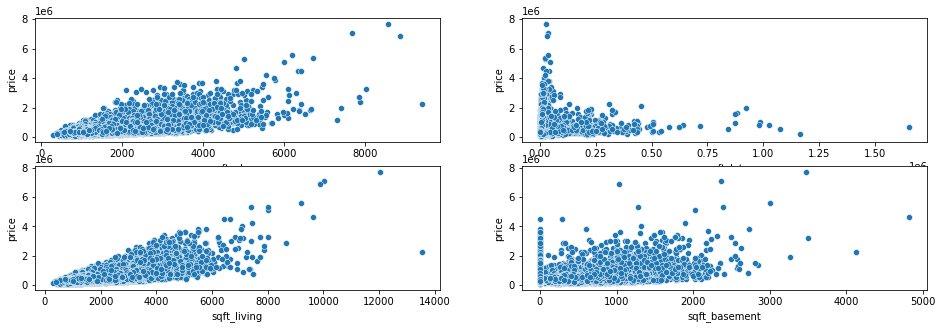

In [12]:
#visualizing square foot area related to home, lot, above and basement
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(x = Dataframe['sqft_above'],y = Dataframe['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(x = Dataframe['sqft_lot'],y = Dataframe['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(x = Dataframe['sqft_living'],y = Dataframe['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(x = Dataframe['sqft_basement'],y = Dataframe['price'])
plt.show()

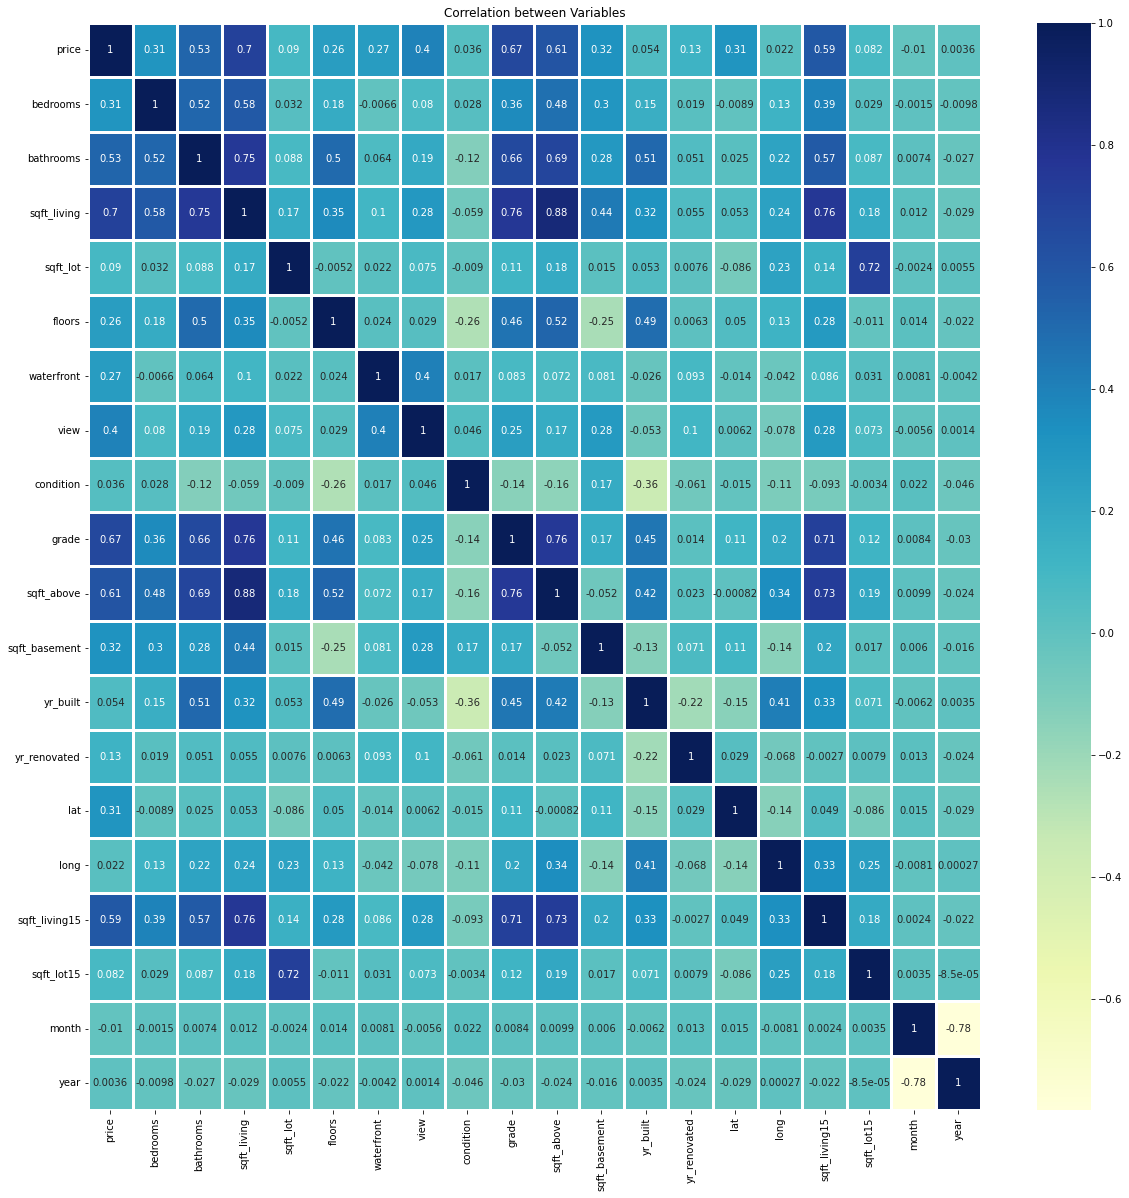

In [13]:
#correlation of variables
fig = plt.figure(figsize=(20,20))
sns.heatmap(Dataframe.corr(),annot=True,linewidths=3,cmap="YlGnBu")
plt.title("Correlation between Variables")
plt.show()

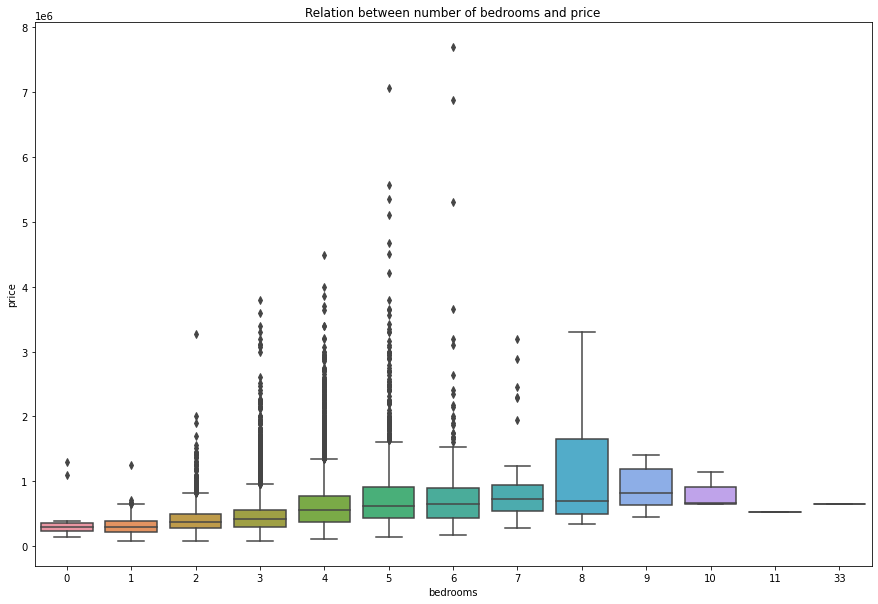

In [14]:
#relations between bedrooms and prices
plt.figure(figsize = (15,10))
sns.boxplot(x = 'bedrooms',y = 'price', data = Dataframe)
plt.title("Relation between number of bedrooms and price")
plt.show()

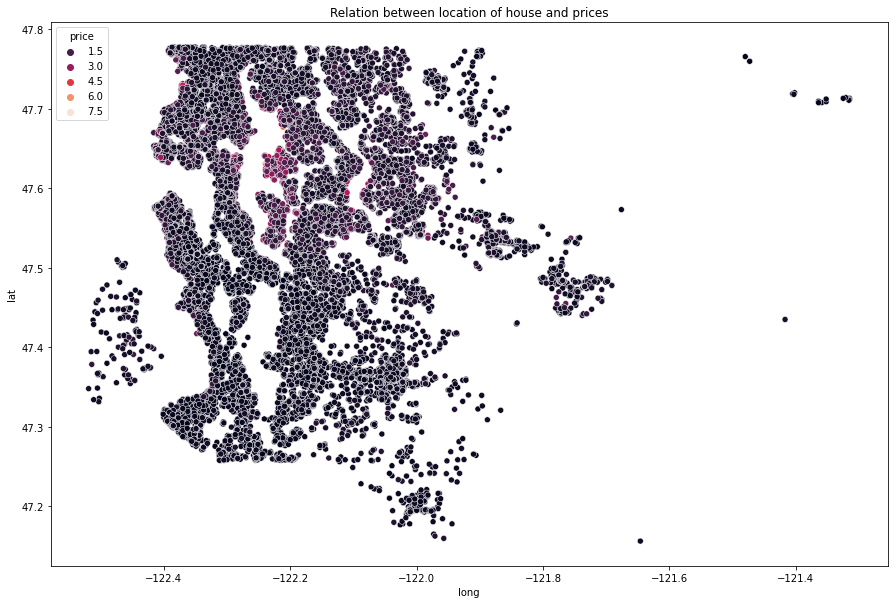

In [15]:
#Location of flats and their prices
#Show the relation between location of house and prices
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'long',y = 'lat',data = Dataframe, hue = 'price', palette = "rocket")
plt.title("Relation between location of house and prices")
plt.show()

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64


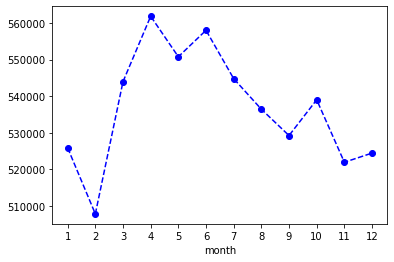

In [16]:
#Data visualization of House Price vs Month
data_1  = (Dataframe.groupby('month').mean()['price'])
print(data_1)

x = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(x,data_1,marker='o', color='b',linestyle="--")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('month')
plt.show()

year
2014    539181.428415
2015    541988.992264
Name: price, dtype: float64


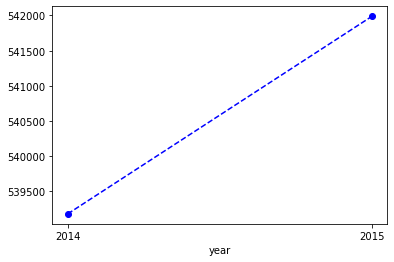

In [17]:
#Data visualization of House Price vs year
data_2  = (Dataframe.groupby('year').mean()['price'])
print(data_2)

x = [2014,2015]
plt.plot(x,data_2,marker='o', color='b',linestyle="--")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('year')
plt.show()

#### Model Building
#### Dataset Preparation (Splitting and Scaling):
1. Data is divided into 'train' and 'test' set.
2. Train set is used to made algorithm to learn data's behaviour.
3. Test set is used to check accuracy of trained model.

#### Splitting into 'train' and 'test' dataset-
1. x(represent features): columns which are inserted in model, which will be used to make predictions.It is also called predictor variable.
2. y(represent prediction): It's value is predicted, this is a target variable. It is also called as criterion variable.

In [18]:
x = Dataframe.drop('price',axis = 1).values#numpy array
y = Dataframe['price'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)
#train_test_split is a function for splitting data arrays into two subsets: for training data and for testing data. 

In [19]:
#Feature scaling will help us see all the variables from the same scale
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train.astype(np.float64))
x_test = s_scaler.transform(x_test.astype(np.float64))

### Model Selection and Evaluation

### Regression model

1. Linear regression- Find out the best fitting line between dependant and independant variable.
2. It has 2 types: Simple linear regression and Multiple linear regression.
3. Simple linear regression - Only one variable is used for prediction.
4. Multiple linear regression - More than one variables used for prediction.

#### 1. Multiple Linear Regression model

In [20]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
ml_reg = LinearRegression()  
ml_reg.fit(x_train, y_train)

#predicting the test set result
y_pred_ml = ml_reg.predict(x_test)
print(y_pred_ml)

#comparison of actual output values with predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ml})
df.head(10)

[525752.16123399 669348.91848636 552270.44470257 ...  73615.4121392
 331424.46198576  30936.95919585]


,Actual,Predicted
0,349950.0,525752.161234
1,450000.0,669348.918486
2,635000.0,552270.444703
3,355500.0,349772.401937
4,246950.0,64178.194244
5,406550.0,491199.051586
6,350000.0,312921.528468
7,226500.0,272613.811314
8,265000.0,279984.348274
9,656000.0,529774.758589


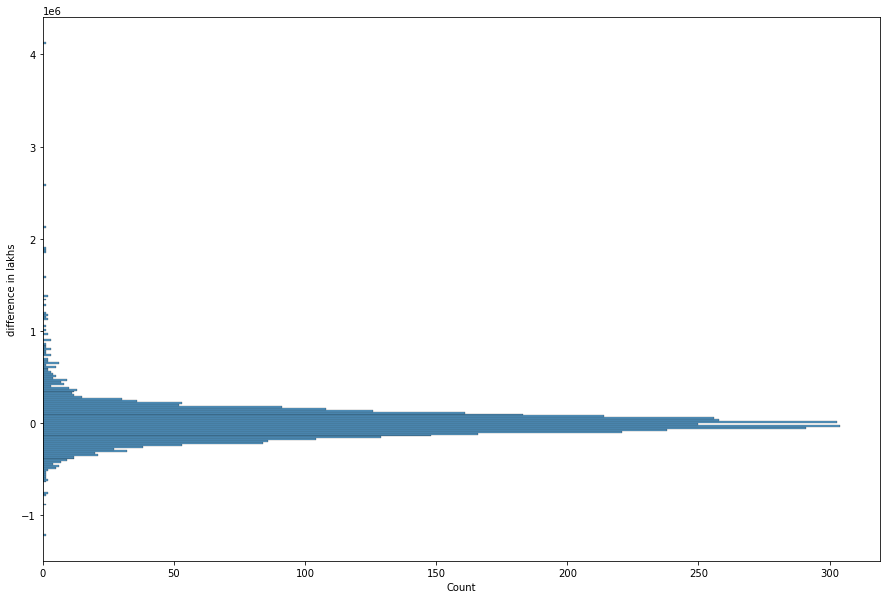

In [21]:
# visualizing difference in prices (predicted and actual)
fig = plt.figure(figsize=(15,10))
difference = (y_test - y_pred_ml)
sns.histplot(y = difference)
plt.ylabel("difference in lakhs")
plt.show()


#### Evaluation of performance
1. Mean Absolute Error: The average of the difference between the Original Values and the Predicted Values.
2. Mean Square Error: The average of square of the difference between the original values and the predicted values
3. Root Mean Square Error: The root of mean square error
4. Variance Score: dispersion of errors of a given dataset.

In [22]:
#To evaluate the performance of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ml))  
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred_ml))  
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ml)))
mlr_var = metrics.explained_variance_score(y_test,y_pred_ml)
print('Variance Score:',mlr_var*100,"%")

Mean Absolute Error: 122004.7001492808
Mean Square Error: 39900085685.592415
Root Mean Square Error: 199750.05803651825
Variance Score: 70.75585075954514 %


#### 2. Decision Tree 

1. The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data)
2. For predicting a class label for a record we start from the root of the tree.
3. It is a tree-like graph structure where internal nodes represent the features of a dataset, branches represent the decision rules, and each leaf node represents the outcome.

In [23]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree.fit(x_train,y_train)

y_pred_dt = decision_tree.predict(x_test)
print(y_pred_dt)

#comparison of actual output values with predicted values
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
df3.head(10)

[405000. 540000. 631500. ... 230500. 465500. 156000.]


,Actual,Predicted
0,349950.0,405000.0
1,450000.0,540000.0
2,635000.0,631500.0
3,355500.0,320000.0
4,246950.0,256703.0
5,406550.0,600000.0
6,350000.0,399950.0
7,226500.0,243500.0
8,265000.0,325000.0
9,656000.0,535000.0


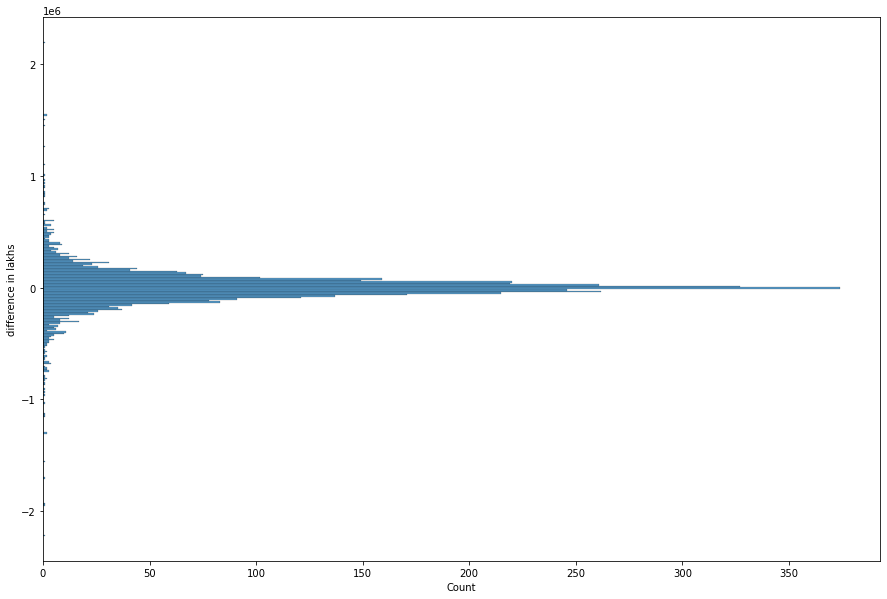

In [24]:
# visualizing difference in prices (predicted and actual)
fig = plt.figure(figsize=(15,10))
difference = (y_test - y_pred_dt)
sns.histplot(y = difference)
plt.ylabel("difference in lakhs")
plt.show()

#### Evaluation of performance

In [25]:
#To evaluate the performance of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dt))  
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred_dt))  
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))
dt_var = metrics.explained_variance_score(y_test,y_pred_dt)
print('Variance Score:',dt_var*100,"%")

Mean Absolute Error: 98972.6365949572
Mean Square Error: 32571036214.66898
Root Mean Square Error: 180474.47524419895
Variance Score: 76.12947451134553 %


#### 3. Random Forest model

1. Random forest algorithm is widely used for classification and regression problems.
2. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.
3. It can handle the dataset containing continuous variables as in the case of regression and categorical variables as in the case of classification.
4. n_estimators is the number of decision trees the algorithm should build before taking maximum voting or an average.

In [26]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=28,random_state=0)
random_forest.fit(x_train,y_train)

y_pred_rf =random_forest.predict(x_test)
print(y_pred_rf)

#comparison of actual output values with predicted values
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
df2.head(10)

[306283.92857143 474514.28571429 663026.78571429 ... 169327.71428571
 387534.32142857 162325.        ]


,Actual,Predicted
0,349950.0,306283.928571
1,450000.0,474514.285714
2,635000.0,663026.785714
3,355500.0,400960.714286
4,246950.0,253898.142857
5,406550.0,592328.571429
6,350000.0,396923.214286
7,226500.0,223233.928571
8,265000.0,268010.714286
9,656000.0,596785.714286


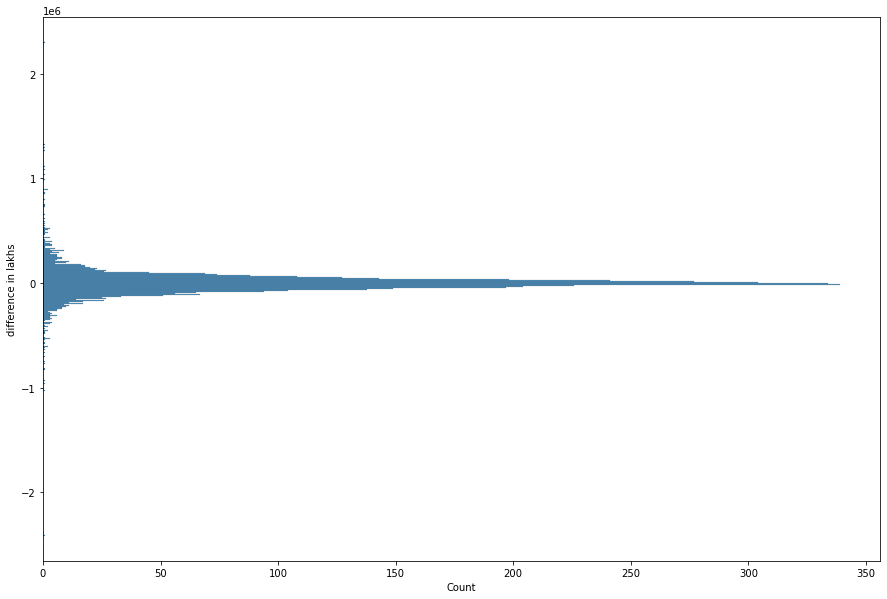

In [27]:
# visualizing difference in prices (predicted and actual)
fig = plt.figure(figsize=(15,10))
difference = (y_test - y_pred_rf)
sns.histplot(y = difference)
plt.ylabel("difference in lakhs")
plt.show()

#### Evaluation of performance

In [28]:
#To evaluate the performance of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
rf_var = metrics.explained_variance_score(y_test,y_pred_rf)
print('Variance Score:',rf_var*100,"%")

Mean Absolute Error: 69616.12407058591
Mean Square Error: 17750596428.198116
Root Mean Square Error: 133231.36428108104
Variance Score: 86.99084175062373 %


In [29]:
#Let's have a tabular pandas data frame, for a clear comparison
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_var*100,dt_var*100,rf_var*100],
                           })
models_score

,Model,Score
0,Multiple Linear Regression,70.755851
1,Decision Tree,76.129475
2,Random forest Regression,86.990842


#### Conclusion - 
Random forest regression model is most suitable for prediction of house prices among three models.